In this notebook, we develop new models that have the same structure as the previous models. We adapt them to be able to train on more data (including the mobility and the number of infected)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats
import sys
sys.path.append('./models/')
from SIRD import *
from exponential_regression import *
from Arima import *


C:\Users\grego\AppData\Local\Temp\ipykernel_24716\1841875172.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# importing mobility from the csv file
df_mobility=pd.read_csv('mobility.csv')
df_mobility.drop(columns=['Unnamed: 0'], inplace=True)
mobility=np.array(df_mobility['mobility'])

df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
n_infected=np.array(df['n_infected'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))
mob_shifted=np.concatenate((np.array([ 0 for i in range(17)]), mobility))
mob_17_days_ahead=(np.array([mob_shifted[i-17] for i in range(17, len(mob_shifted))]))

In [10]:
split = 70
reach=7
deaths_train=new_deaths[:split]
infected_train=n_infected[:split]
mob_train=mob_17_days_ahead[:split]
data_train=np.array([deaths_train, infected_train, mob_train])
dates_of_pandemic_train=dates_of_pandemic[:split]

In [4]:
data =np.array([ new_deaths, n_infected, mob_17_days_ahead ])

Multi dimensional exponential regression : 

In [5]:
myexp=ExponentialRegression()
myexp.train(dates_of_pandemic_train, data_train[0])

In [6]:
myexp_multi=MultiDimensionalExponentialRegression()
myexp_multi.train(dates_of_pandemic_train, data_train)

c:\Users\grego\Documents\code\covid_internship\models\exponential_regression.py:235: OptimizeWarning: Covariance of the parameters could not be estimated
  p, cov =curve_fit(exponential_function_m, (train_dates[interval], n_infected_normalized[interval1], data[2][interval2]),data[0][interval],  p0=[ 1,1, 1, 1,1], maxfev = 10000)
c:\Users\grego\Documents\code\covid_internship\models\exponential_regression.py:163: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * mobility + c * i+ d * n_infected) +e


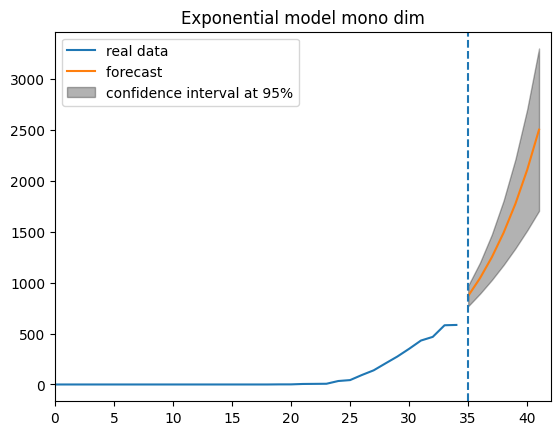

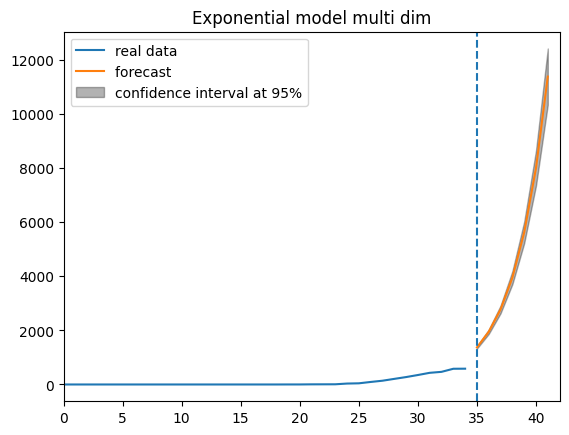

In [7]:
myexp.plot(7, 0.05, title='Exponential model mono dim')
myexp_multi.plot(7, 0.05, title='Exponential model multi dim')

Multi dimensional SIRD

In [8]:

sird_multi=Multi_SIRD_model()
sird_multi.choose_model(True, True, True)
sird_multi.train(dates_of_pandemic_train, data_train)
sird_multi.plot(7, 0.05, title='Multi-dimensional SIRD model, split = '+ str(split))


KeyboardInterrupt: 

VAR: 

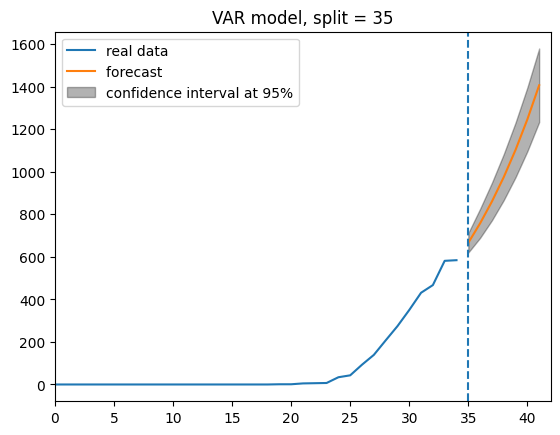

In [9]:
myvar=VAR_m()
myvar.train(dates_of_pandemic_train, data_train)
myvar.plot(7, 0.05, title='VAR model, split = '+ str(split))